<a href="https://colab.research.google.com/github/suhas2071/Coursera_Capstone/blob/master/AI_Project_Bird_Classification_05_09_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://atosvlit2021.s3.ap-southeast-1.amazonaws.com/Bird_Classification.rar

--2021-12-10 02:22:29--  https://atosvlit2021.s3.ap-southeast-1.amazonaws.com/Bird_Classification.rar
Resolving atosvlit2021.s3.ap-southeast-1.amazonaws.com (atosvlit2021.s3.ap-southeast-1.amazonaws.com)... 52.219.128.23
Connecting to atosvlit2021.s3.ap-southeast-1.amazonaws.com (atosvlit2021.s3.ap-southeast-1.amazonaws.com)|52.219.128.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 972135960 (927M) [application/x-www-form-urlencoded]
Saving to: ‘Bird_Classification.rar’

Bird_Classification 100%[===================>] 927.10M  15.7MB/s    in 63s     

2021-12-10 02:23:33 (14.8 MB/s) - ‘Bird_Classification.rar’ saved [972135960/972135960]



In [ ]:
!wget https://atosvlit2021.s3.ap-southeast-1.amazonaws.com/yolo.h5

--2021-12-10 08:44:57--  https://atosvlit2021.s3.ap-southeast-1.amazonaws.com/yolo.h5
Resolving atosvlit2021.s3.ap-southeast-1.amazonaws.com (atosvlit2021.s3.ap-southeast-1.amazonaws.com)... 52.219.124.111
Connecting to atosvlit2021.s3.ap-southeast-1.amazonaws.com (atosvlit2021.s3.ap-southeast-1.amazonaws.com)|52.219.124.111|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248686624 (237M) [application/x-www-form-urlencoded]
Saving to: ‘yolo.h5’

yolo.h5             100%[===================>] 237.17M  15.3MB/s    in 18s     

2021-12-10 08:45:16 (13.3 MB/s) - ‘yolo.h5’ saved [248686624/248686624]



In [ ]:
!pip install imageai

     |████████████████████████████████| 160 kB 5.4 MB/s 
     |████████████████████████████████| 2.1 MB 40.2 MB/s 
     |████████████████████████████████| 11.6 MB 13.9 MB/s 
     |████████████████████████████████| 2.9 MB 37.9 MB/s 
     |████████████████████████████████| 14.9 MB 42.7 MB/s 
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20486 sha256=5296f121bf6b2449536a950ef457995536e3da16b8a4caa8fc2d51d4a0e3f668
  Stored in directory: /root/.cache/pip/wheels/bd/ef/06/5d65f696360436c3a423020c4b7fd8c558c09ef264a0e6c575
Successfully built keras-resnet
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
 

In [ ]:
from imageai.Detection import VideoObjectDetection
import os

execution_path = os.getcwd()

detector = VideoObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath(os.path.join(execution_path , "yolo.h5"))
detector.loadModel()

In [ ]:
video_path = detector.detectObjectsFromVideo(input_file_path=os.path.join( execution_path, "traffic-mini.mp4"),
                                output_file_path=os.path.join(execution_path, "Suhas_in_Traffic_1")
                                , frames_per_second=5, log_progress=True)
print(video_path)

In [ ]:
!wget https://atosvlit2021.s3.ap-southeast-1.amazonaws.com/resnet50_weights_tf_dim_ordering_tf_kernels.h5

--2021-12-10 06:04:09--  https://atosvlit2021.s3.ap-southeast-1.amazonaws.com/resnet50_weights_tf_dim_ordering_tf_kernels.h5
Resolving atosvlit2021.s3.ap-southeast-1.amazonaws.com (atosvlit2021.s3.ap-southeast-1.amazonaws.com)... 52.219.132.39
Connecting to atosvlit2021.s3.ap-southeast-1.amazonaws.com (atosvlit2021.s3.ap-southeast-1.amazonaws.com)|52.219.132.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102853048 (98M) [application/x-www-form-urlencoded]
Saving to: ‘resnet50_weights_tf_dim_ordering_tf_kernels.h5.1’

resnet50_weights_tf 100%[===================>]  98.09M  14.6MB/s    in 8.6s    

2021-12-10 06:04:18 (11.4 MB/s) - ‘resnet50_weights_tf_dim_ordering_tf_kernels.h5.1’ saved [102853048/102853048]



In [ ]:
!pip install imageai

In [ ]:
from keras.models import Model
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input,decode_predictions
#https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50
from keras.preprocessing import image
#https://keras.io/preprocessing/image/

import numpy as np
# Create pre-trained ResNet50 without top layer

model_resnet = ResNet50(weights="imagenet")

102973440/102967424 [==============================] - 1s 0us/step


In [ ]:

#https://gogul09.github.io/software/flower-recognition-deep-learning
img_path="o1.jpg"
#img_path="f16.jpg"
#img_path="car.jpg"

img=image.load_img(img_path,target_size=(224,224))
#https://stackoverflow.com/questions/54672631/what-is-in-keras-img-to-array-compared-to-bitmap-array-in-c
x=image.img_to_array(img)

x=np.expand_dims(x,axis=0)
x=preprocess_input(x)
preds=model_resnet.predict(x)
print("Predicted:",decode_predictions(preds,top=3)[0])


40960/35363 [==================================] - 0s 0us/step
Predicted: [('n01518878', 'ostrich', 0.99996877), ('n02437312', 'Arabian_camel', 1.795648e-05), ('n02018795', 'bustard', 8.74283e-06)]


In [ ]:
!wget https://atosvlit2021.s3.ap-southeast-1.amazonaws.com/inception_v3_weights_tf_dim_ordering_tf_kernels.h5

--2021-12-10 06:06:39--  https://atosvlit2021.s3.ap-southeast-1.amazonaws.com/inception_v3_weights_tf_dim_ordering_tf_kernels.h5
Resolving atosvlit2021.s3.ap-southeast-1.amazonaws.com (atosvlit2021.s3.ap-southeast-1.amazonaws.com)... 52.219.133.47
Connecting to atosvlit2021.s3.ap-southeast-1.amazonaws.com (atosvlit2021.s3.ap-southeast-1.amazonaws.com)|52.219.133.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96112376 (92M) [application/x-www-form-urlencoded]
Saving to: ‘inception_v3_weights_tf_dim_ordering_tf_kernels.h5’

inception_v3_weight 100%[===================>]  91.66M  14.8MB/s    in 7.7s    

2021-12-10 06:06:48 (11.9 MB/s) - ‘inception_v3_weights_tf_dim_ordering_tf_kernels.h5’ saved [96112376/96112376]



In [ ]:
!pip install imageai

In [ ]:
from imageai.Prediction import ImagePrediction
import os
#execution_path = os.getcwd()
#The method getcwd() returns current working directory of a process.
prediction = ImagePrediction()

#prediction.setModelTypeAsResNet()
#prediction.setModelPath("/content/resnet50_weights_tf_dim_ordering_tf_kernels.h5.1")

prediction.setModelTypeAsInceptionV3()
prediction.setModelPath("inception_v3_weights_tf_dim_ordering_tf_kernels.h5")
prediction.loadModel()

In [ ]:
predictions, percentage_probabilities = prediction.predictImage("o1.jpg", result_count=5)
print(predictions)
print(percentage_probabilities )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: '.predictImage()' has been deprecated! Please use 'classifyImage()' instead.
  """Entry point for launching an IPython kernel.


['ostrich', 'llama', 'black_swan', 'Arabian_camel', 'bell_cote']
[99.99983310699463, 8.910765245673247e-05, 5.173288286641764e-05, 6.445500844165508e-06, 9.88404291746292e-07]


In [ ]:
!unrar x Bird_Classification.rar

Streaming output truncated to the last 5000 lines.
Extracting  Bird_Classification/train/TRUMPTER SWAN/103.jpg               88%  OK 
Extracting  Bird_Classification/train/TRUMPTER SWAN/104.jpg               89%  OK 
Extracting  Bird_Classification/train/TRUMPTER SWAN/105.jpg               89%  OK 
Extracting  Bird_Classification/train/TRUMPTER SWAN/106.jpg               89%  OK 
Extracting  Bird_Classification/train/TRUMPTER SWAN/107.jpg               89%  OK 
Extracting  Bird_Classification/train/TRUMPTER SWAN/108.jpg               89%  OK 
Extracting  Bird_Classification/train/TRUMPTER SWAN/109.jpg               89%  OK 
Extracting  Bird_Classification/train/TRUMPTER SWAN/110.jpg               89%  OK 
Extracting  Bird_Classification/train/TRUMPTER SWAN/111.jpg               89%  OK 
Extracting  Bird_Classification/train/TRUMPTER SWAN/112.jpg               89%  OK 
Extracting  Bird_Classificati

In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

import os
import warnings
warnings.simplefilter('ignore')

import cv2
import tensorflow as tf
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense,Conv2D,Lambda,Flatten
from tensorflow.keras.layers import Input,MaxPooling2D

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator


from keras.models import load_model
from keras.preprocessing.image import load_img,img_to_array

In [ ]:
df = pd.read_csv("/content/Bird_Classification/Bird Species.csv")

In [ ]:
df.head()

,filepaths,labels,data set
0,train/AFRICAN CROWNED CRANE/001.jpg,AFRICAN CROWNED CRANE,train
1,train/AFRICAN CROWNED CRANE/002.jpg,AFRICAN CROWNED CRANE,train
2,train/AFRICAN CROWNED CRANE/003.jpg,AFRICAN CROWNED CRANE,train
3,train/AFRICAN CROWNED CRANE/004.jpg,AFRICAN CROWNED CRANE,train
4,train/AFRICAN CROWNED CRANE/005.jpg,AFRICAN CROWNED CRANE,train


In [ ]:
train = '/content/Bird_Classification/train'
test = '/content/Bird_Classification/test'
val = '/content/Bird_Classification/valid'

In [ ]:
print("Total Number Of species are: ",len(os.listdir(train)))


Total Number Of species are:  285


In [ ]:
count = 0
for i in os.listdir(train):
    x = train +'/'+ str(i)
    count = count + len(x)
print("Total No of Images",count)

Total No of Images 14007


In [ ]:
for i in os.listdir(train):
    x = train +'/'+ str(i)
    print("Total No of Images in {} are {}".format(str(i),len(x)))

Total No of Images in SRI LANKA BLUE MAGPIE are 56
Total No of Images in HOODED MERGANSER are 51
Total No of Images in BLACK THROATED WARBLER are 57
Total No of Images in PARADISE TANAGER are 51
Total No of Images in BANDED BROADBILL are 51
Total No of Images in RAZORBILL are 44
Total No of Images in D-ARNAUDS BARBET are 51
Total No of Images in OSTRICH are 42
Total No of Images in GREY PLOVER are 46
Total No of Images in NORTHERN SHOVELER are 52
Total No of Images in PARAKETT  AKULET are 51
Total No of Images in GOLDEN CHLOROPHONIA are 54
Total No of Images in WATTLED CURASSOW are 51
Total No of Images in AMERICAN AVOCET are 50
Total No of Images in BROWN CREPPER are 48
Total No of Images in HOUSE FINCH are 46
Total No of Images in BARN OWL are 43
Total No of Images in GUINEAFOWL are 45
Total No of Images in BELTED KINGFISHER are 52
Total No of Images in VERMILION FLYCATHER are 54
Total No of Images in BLACK & YELLOW bROADBILL are 59
Total No of Images in ANHINGA are 42
Total No of Im

In [ ]:
df = df.sample(frac=1)
df_for_img = df.head()

In [ ]:
df_for_img

,filepaths,labels,data set
2798,train/BALI STARLING/081.jpg,BALI STARLING,train
10021,train/COCKATOO/166.jpg,COCKATOO,train
55,train/AFRICAN CROWNED CRANE/056.jpg,AFRICAN CROWNED CRANE,train
11912,train/CUBAN TODY/080.jpg,CUBAN TODY,train
11217,train/CRESTED AUKLET/025.jpg,CRESTED AUKLET,train


In [ ]:
paths = []
for i in range(5):
    x = df_for_img.iloc[i][0].split('\\')
    y = '/'.join(x)
    paths.append(y)
df_path = pd.DataFrame(paths)
df_path.columns=['paths']
df_path

,paths
0,train/BALI STARLING/081.jpg
1,train/COCKATOO/166.jpg
2,train/AFRICAN CROWNED CRANE/056.jpg
3,train/CUBAN TODY/080.jpg
4,train/CRESTED AUKLET/025.jpg


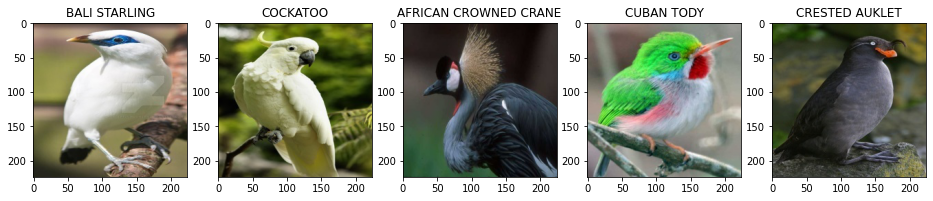

In [ ]:
plt.figure(figsize=(16,11))
folder = '/content/Bird_Classification/'    
for i in range(5):
    plt.subplot(1,5,i+1)
    x = folder + df_path.iloc[i][0]
    image = plt.imread(x)
    plt.imshow(image)
    plt.title(df_for_img.iloc[i][1])

In [ ]:
image_size = [224,224]
vgg = VGG16(input_shape = image_size + [3],
            weights = 'imagenet',include_top=False)

for layer in vgg.layers:
    layer.trainable = False

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
folder = len(os.listdir(train))
folder

285

In [ ]:
x = Flatten()(vgg.output)
classification = Dense(int(folder),activation='softmax')(x)

model = Model(inputs = vgg.input,outputs = classification)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [ ]:
train_generator = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2)

test_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
train_set = train_generator.flow_from_directory(train,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode = 'categorical')

valid_set = train_generator.flow_from_directory(val,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode = 'categorical')

test_set = test_generator.flow_from_directory(test,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode = 'categorical')

Found 40930 images belonging to 285 classes.
Found 1425 images belonging to 285 classes.
Found 1425 images belonging to 285 classes.


In [ ]:
if tf.test.gpu_device_name(): 
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Please install GPU version of TF


In [ ]:
history = model.fit(train_set,validation_data = valid_set,
                    epochs=5,steps_per_epoch=len(train_set),
                    validation_steps=len(test_set))

Epoch 1/5
1280/1280 [==============================] - 670s 494ms/step - loss: 5.7114 - accuracy: 0.2516 - val_loss: 3.9020 - val_accuracy: 0.4372
Epoch 2/5
1280/1280 [==============================] - 625s 488ms/step - loss: 4.3720 - accuracy: 0.4235 - val_loss: 3.8008 - val_accuracy: 0.5025
Epoch 3/5
1280/1280 [==============================] - 625s 489ms/step - loss: 4.0079 - accuracy: 0.4905 - val_loss: 3.7224 - val_accuracy: 0.5579
Epoch 4/5
1280/1280 [==============================] - 624s 487ms/step - loss: 3.7659 - accuracy: 0.5349 - val_loss: 3.8464 - val_accuracy: 0.5488
Epoch 5/5
  15/1280 [..............................] - ETA: 10:03 - loss: 3.6075 - accuracy: 0.5271

In [ ]:
#Training
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['Train','Test'],loc='upper left')
plt.show()
#Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(['Train','Test'],loc='upper left')
plt.show()

NameError: ignored